# Задание 1: Стандартные аугментации torchvision
1. Создайте пайплайн стандартных аугментаций torchvision \
(например, RandomHorizontalFlip, RandomCrop, ColorJitter, RandomRotation, RandomGrayscale).
2. Примените аугментации к 5 изображениям из разных классов (папка train).
3. Визуализируйте:
    - Оригинал
    - Результат применения каждой аугментации отдельно
    - Результат применения всех аугментаций вместе

In [50]:
import torch
from torchvision import transforms
from PIL import Image
from datasets import CustomImageDataset
from utils import show_images, show_single_augmentation, show_multiple_augmentations
from extra_augs import (AddGaussianNoise, RandomErasingCustom, CutOut, 
                       Solarize, Posterize, AutoContrast, ElasticTransform)


=== Демонстрация отдельных аугментаций ===


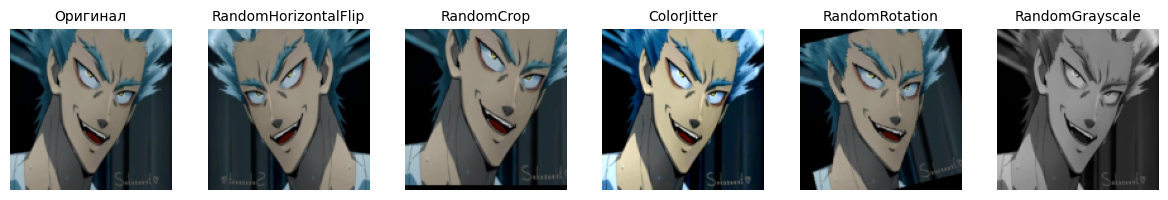

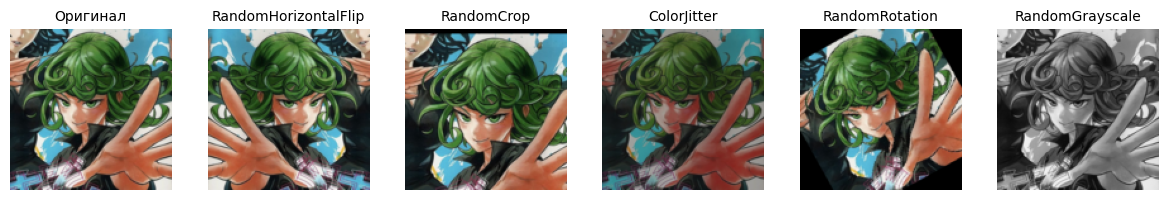

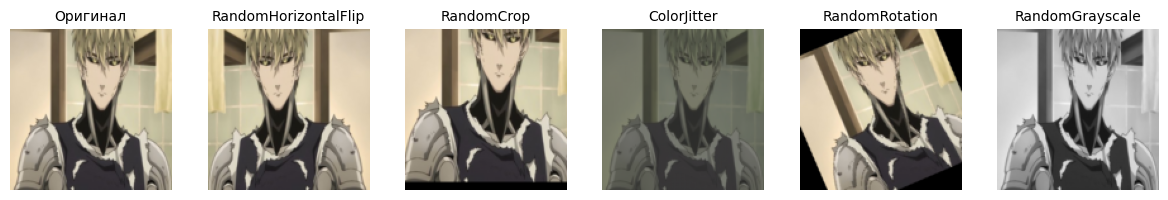

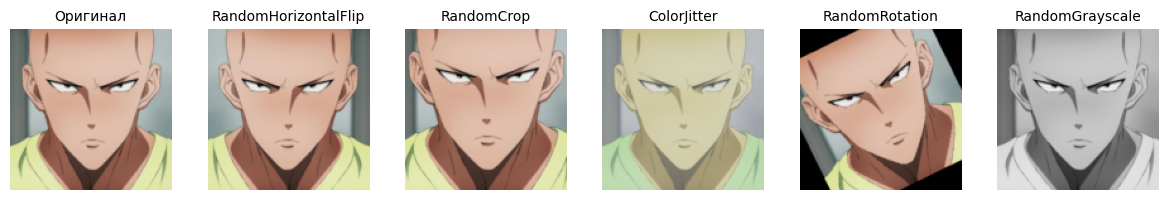

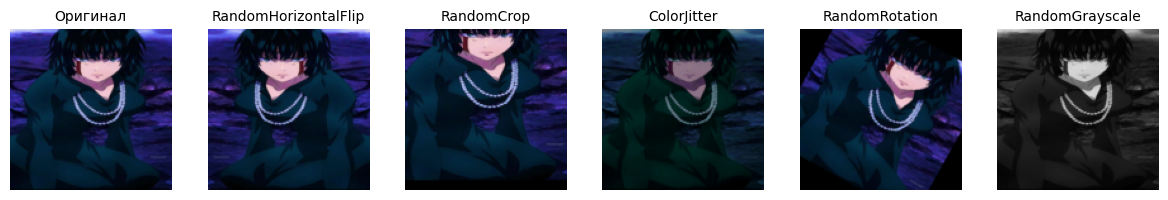

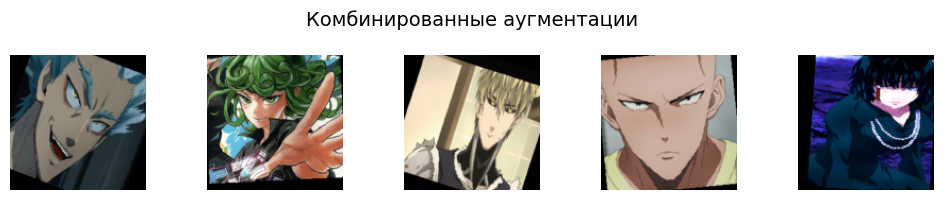

In [51]:
# Загрузка датасета без аугментаций
root = '/home/egikor/ML/Pratic in git/lesson5-augmentations/data/train'
dataset = CustomImageDataset(root, transform=None, target_size=(224, 224))

images = []
images_index = (0, 123, 52, 85, 162)
for idx in images_index:
    # Берем одно изображение для демонстрации
    original_img, label = dataset[idx]
    images.append(original_img)


# Демонстрация каждой аугментации отдельно
print("\n=== Демонстрация отдельных аугментаций ===")
standard_augs = [
    ("RandomHorizontalFlip", transforms.RandomHorizontalFlip(p=1.0)),
    ("RandomCrop", transforms.RandomCrop(200, padding=20)),
    ("ColorJitter", transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.1)),
    ("RandomRotation", transforms.RandomRotation(degrees=30)),
    ("RandomGrayscale", transforms.RandomGrayscale(p=1.0))
]

augmented_imgs = []
titles = []

to_tensor = transforms.ToTensor()
for image in images:
    original_img = image
    for name, aug in standard_augs:
        aug_transform = transforms.Compose([
            aug,
            transforms.ToTensor()
        ])
        aug_img = aug_transform(original_img)
        augmented_imgs.append(aug_img)
        titles.append(name)
    show_multiple_augmentations(to_tensor(original_img), augmented_imgs, titles)
    augmented_imgs = []


combined_aug = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomCrop(200, padding=20),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.RandomRotation(degrees=30),
    transforms.RandomGrayscale(),
    transforms.ToTensor()
])

combined_imgs = []
for image in images:
    original_img = image
    combined_img = combined_aug(original_img)
    combined_imgs.append(combined_img)

show_images(combined_imgs, title="Комбинированные аугментации", nrow=5) 

# Задание 2: Кастомные аугментации
1. Реализуйте минимум 3 кастомные аугментации (например, случайное размытие, случайная перспектива, случайная яркость/контрастность).
2. Примените их к изображениям из train.
3. Сравните визуально с готовыми аугментациями из extra_augs.py.

In [52]:
from custom_augs import RandomBrightness, RandomGaussianBlur, RandomPerspectiveTransform

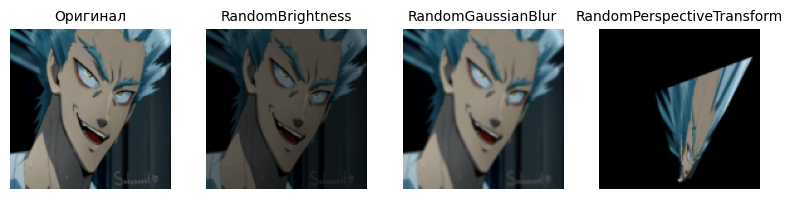

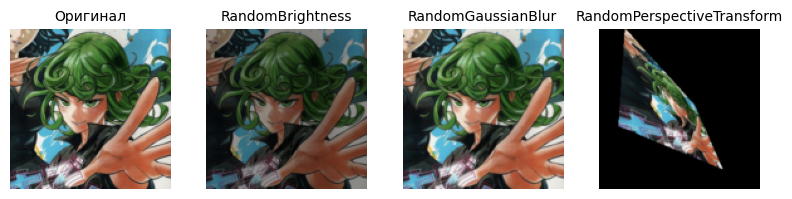

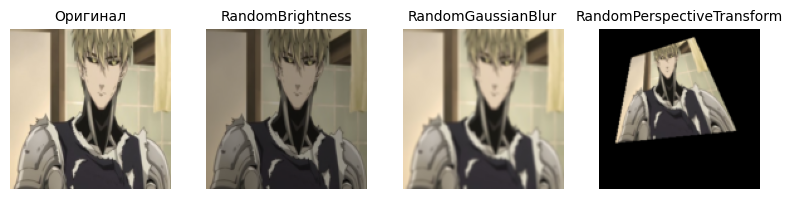

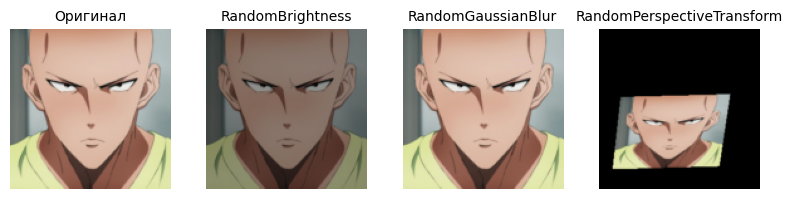

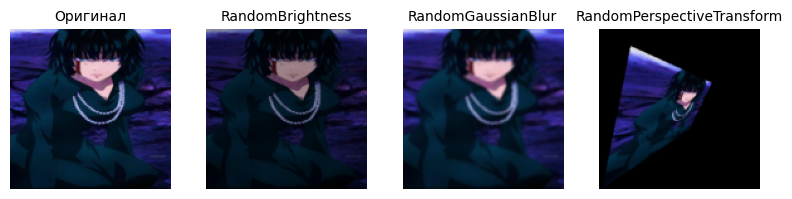

In [53]:
custom_augs = [
    ("RandomBrightness", RandomBrightness(brightness=(0.5, 0.7, ), p = 100)),
    ("RandomGaussianBlur", RandomGaussianBlur(p = 100)),
    ("RandomPerspectiveTransform", RandomPerspectiveTransform(p = 100)),
]
titles=[]
to_tensor = transforms.ToTensor()
for image in images:
    original_img = image
    for name, aug in custom_augs:
        aug_transform = transforms.Compose([
            aug,
            transforms.ToTensor()
        ])
        aug_img = aug_transform(original_img)
        augmented_imgs.append(aug_img)
        titles.append(name)
    show_multiple_augmentations(to_tensor(original_img), augmented_imgs, titles, fontsize=10)
    augmented_imgs = []


# Задание 3: Анализ датасета
1. Подсчитайте количество изображений в каждом классе.
2. Найдите минимальный, максимальный и средний размеры изображений.
3. Визуализируйте распределение размеров и гистограмму по классам.

In [54]:
import matplotlib.pyplot as plt

In [55]:
import os
import torch
from torch.utils.data import Dataset
from PIL import Image
import numpy as np

class CustomImageDatasetWithoutResize(Dataset):
    """Кастомный датасет для работы с папками классов"""
    
    def __init__(self, root_dir, transform=None):
        """
        Args:
            root_dir (str): Путь к папке с классами
            transform: Аугментации для изображений
        """
        self.root_dir = root_dir
        self.transform = transform
        
        # Получаем список классов (папок)
        self.classes = sorted([d for d in os.listdir(root_dir) 
                              if os.path.isdir(os.path.join(root_dir, d))])
        self.class_to_idx = {cls_name: idx for idx, cls_name in enumerate(self.classes)}
        
        # Собираем все пути к изображениям
        self.images = []
        self.labels = []
        
        for class_name in self.classes:
            class_dir = os.path.join(root_dir, class_name)
            class_idx = self.class_to_idx[class_name]
            
            for img_name in os.listdir(class_dir):
                if img_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
                    img_path = os.path.join(class_dir, img_name)
                    self.images.append(img_path)
                    self.labels.append(class_idx)
    
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):
        img_path = self.images[idx]
        label = self.labels[idx]
        
        # Загружаем изображение
        image = Image.open(img_path).convert('RGB')
        
        # Применяем аугментации
        if self.transform:
            image = self.transform(image)
        
        return image, label
    
    def get_class_names(self):
        """Возвращает список имен классов"""
        return self.classes 

Класс Гароу : Длинна 130
Класс Генос : Длинна 130
Класс Сайтама : Длинна 130
Класс Соник : Длинна 130
Класс Татсумаки : Длинна 130
Класс Фубуки : Длинна 130

Максимальный размер: 736 x 1308
Минимальный размер: 210 x 220
Средний размер: 545 x 629



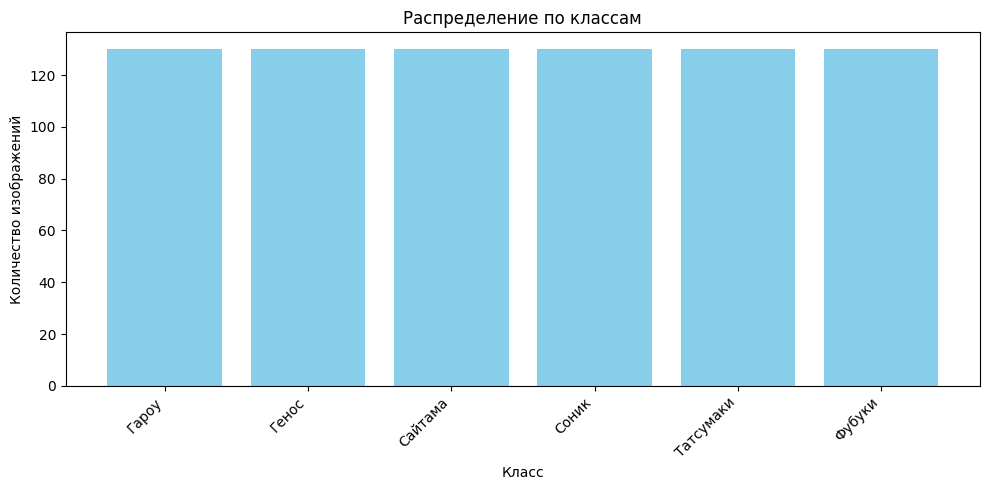

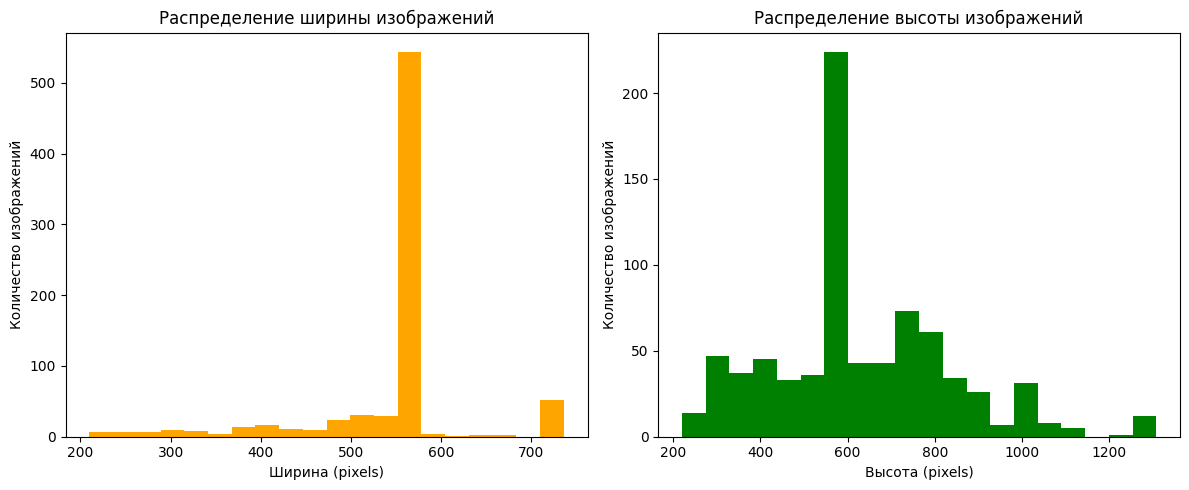

In [56]:
train_dataset = CustomImageDatasetWithoutResize(root_dir = '/home/egikor/ML/Pratic in git/lesson5-augmentations/data/train', 
                                                transform=None)
test_dataset = CustomImageDatasetWithoutResize(root_dir = '/home/egikor/ML/Pratic in git/lesson5-augmentations/data/test',
                                                transform=None)
clesses_len = {}
images_size = []
for idx in range(len(train_dataset)):
    image, label = train_dataset[idx]
    if label not in clesses_len:
        clesses_len[label] = 1
    else:
        clesses_len[label] += 1

    images_size.append(image.size)

for idx in range(len(test_dataset)):
    image, label = test_dataset[idx]
    if label not in clesses_len:
        clesses_len[label] = 1
    else:
        clesses_len[label] += 1

    images_size.append(image.size)

images_size = torch.tensor(images_size)

widths = images_size[:, 0]
heights = images_size[:, 1]

max_len = images_size.max()
min_len = images_size.min()
mean_len = images_size.float().mean()

class_names = dataset.get_class_names()
for (name, count) in clesses_len.items():
    print(f"Класс {class_names[name]} : Длинна {count}")

print(f"""
Максимальный размер: {widths.max()} x {heights.max()}
Минимальный размер: {widths.min()} x {heights.min()}
Средний размер: {int(widths.float().mean())} x {int(heights.float().mean())}
""")

# Сортировка классов по имени
class_ids = list(clesses_len.keys())
counts = [clesses_len[k] for k in class_ids]
class_labels = [class_names[k] for k in class_ids]

plt.figure(figsize=(10, 5))
plt.bar(class_labels, counts, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Класс")
plt.ylabel("Количество изображений")
plt.title("Распределение по классам")
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 5))

# Гистограмма ширин
plt.subplot(1, 2, 1)
plt.hist(widths.numpy(), bins=20, color='orange')
plt.xlabel("Ширина (pixels)")
plt.ylabel("Количество изображений")
plt.title("Распределение ширины изображений")

# Гистограмма высот
plt.subplot(1, 2, 2)
plt.hist(heights.numpy(), bins=20, color='green')
plt.xlabel("Высота (pixels)")
plt.ylabel("Количество изображений")
plt.title("Распределение высоты изображений")

plt.tight_layout()
plt.show()


# Задание 4: Pipeline аугментаций 
1. Реализуйте класс AugmentationPipeline с методами:
    - add_augmentation(name, aug)
    - remove_augmentation(name)
    - apply(image)
    - get_augmentations()
2. Создайте несколько конфигураций (light, medium, heavy).
3. Примените каждую конфигурацию к train и сохраните результаты.

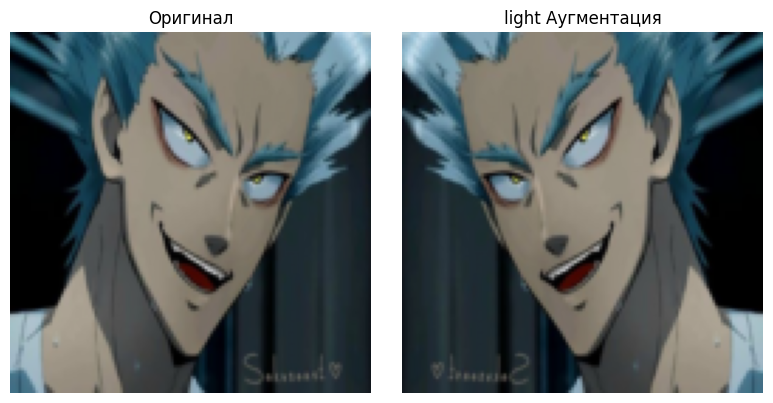

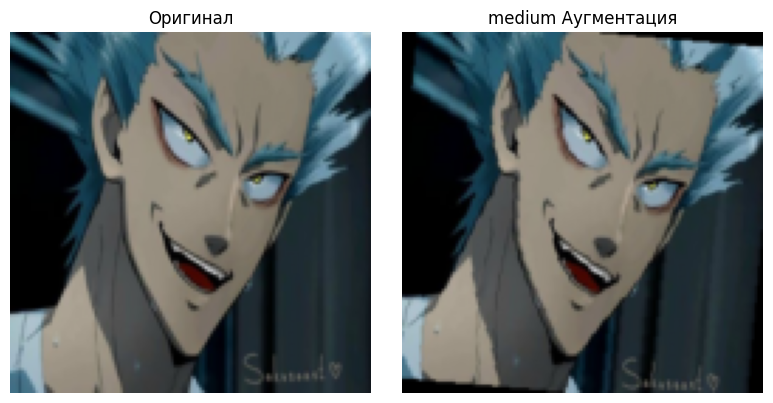

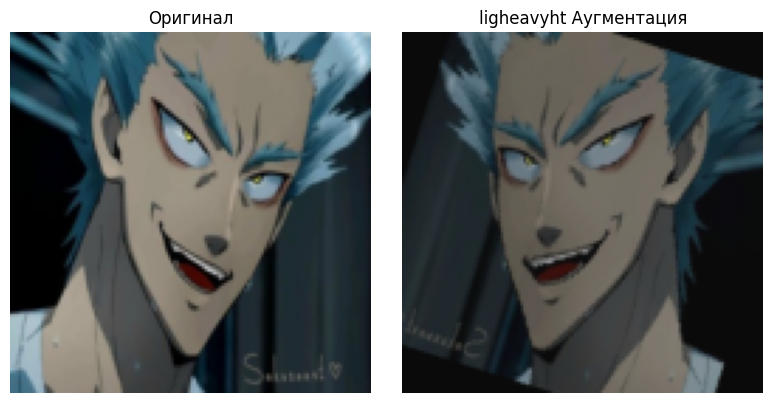

In [57]:
class AugmentationPipeline():
    def __init__(self):
        self.augs_conf = {}


    def add_augmentation(self, name : str, aug):
        self.augs_conf[name] = aug

    def remove_augmentation(self, name : str):
        del self.augs_conf[name]

    def apply(self, image):
        augs = []
        for name, aug in self.augs_conf.items():
            augs.append(aug)

        aug_transform = transforms.Compose([
            *augs
        ])
        output_image = aug_transform(image)
        return output_image

    def get_augmentations(self):
        return self.augs_conf
    

light = AugmentationPipeline()
light.add_augmentation("RandomHorizontalFlip", transforms.RandomHorizontalFlip(p=0.5))

medium = AugmentationPipeline()
medium.add_augmentation("RandomHorizontalFlip", transforms.RandomHorizontalFlip(p=0.5))
medium.add_augmentation("RandomRotation", transforms.RandomRotation(degrees=15))

heavy = AugmentationPipeline()
heavy.add_augmentation("RandomHorizontalFlip", transforms.RandomHorizontalFlip(p=0.5))
heavy.add_augmentation("RandomRotation", transforms.RandomRotation(degrees=30))
heavy.add_augmentation("ColorJitter", transforms.ColorJitter(brightness=0.3, contrast=0.3))

configs = {

    "light" : light,
    "medium" : medium,
    "ligheavyht" : heavy,
}

root = '/home/egikor/ML/Pratic in git/lesson5-augmentations/data/train'
dataset = CustomImageDataset(root, transform=None, target_size=(224, 224))
original_img, label = dataset[0]

for config_name, config_aug in configs.items():
    aug_img = config_aug.apply(original_img)
    aug_img = to_tensor(aug_img)
    show_single_augmentation(to_tensor(original_img), aug_img, title=f"{config_name} Аугментация")



# Задание 5: Эксперимент с размерами 
1. Проведите эксперимент с разными размерами изображений (например, 64x64, 128x128, 224x224, 512x512).
2. Для каждого размера измерьте время загрузки и применения аугментаций к 100 изображениям, а также потребление памяти.
3. Постройте графики зависимости времени и памяти от размера.

In [58]:
import time
from torch.utils.data import DataLoader
import psutil
import tracemalloc


        Время аугментации размера (64, 64) : 0.0540 
        Время загрузки изображений размера (64, 64) : 0.6869
        Потребление памяти: 0.0207 МБ
        

        Время аугментации размера (128, 128) : 0.0772 
        Время загрузки изображений размера (128, 128) : 0.7954
        Потребление памяти: 0.0184 МБ
        

        Время аугментации размера (224, 224) : 0.1156 
        Время загрузки изображений размера (224, 224) : 0.9609
        Потребление памяти: 0.0156 МБ
        

        Время аугментации размера (512, 512) : 0.2785 
        Время загрузки изображений размера (512, 512) : 1.2115
        Потребление памяти: 0.0151 МБ
        


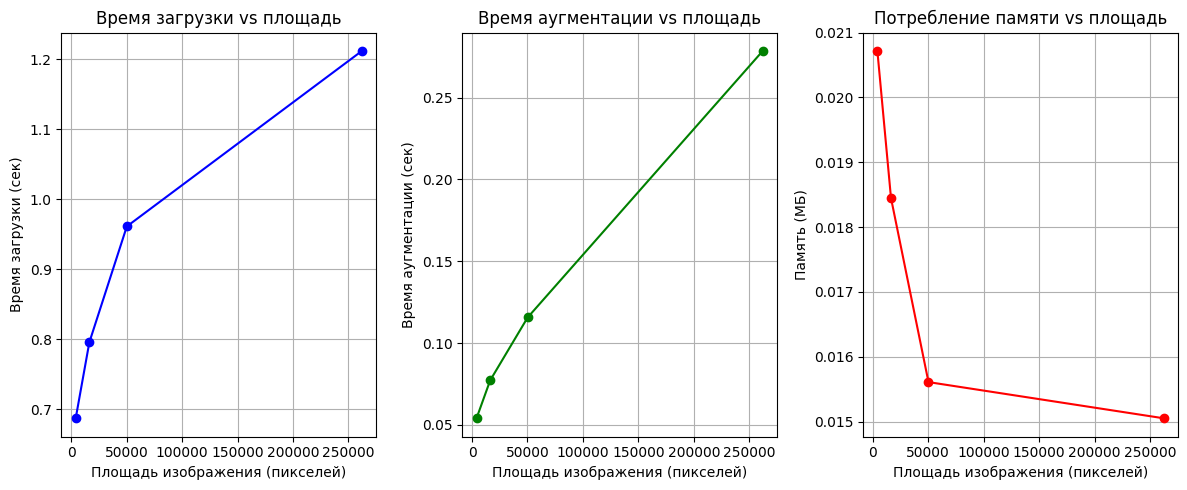

In [59]:

sizes = ((64, 64), (128, 128), (224, 224), (512, 512))
aug = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor()
])

root = '/home/egikor/ML/Pratic in git/lesson5-augmentations/data/train'

load_times = []
aug_times = []
memories = []
areas = [w*h for (w, h) in sizes]


for size in sizes:
    aug_time = 0
    load_time = 0
    dataset = CustomImageDataset(root, transform=None, target_size = size)

    tracemalloc.start()
    snapshot1 = tracemalloc.take_snapshot()
    for image_idx in range(0, 100):

        start_time_load = time.time()
        image, label = dataset[image_idx]
        end_time_load = time.time() 
        load_time += end_time_load - start_time_load

        start_time_aug = time.time()
        aug_image = aug(image)  
        end_time_aug = time.time()
        aug_time += end_time_aug - start_time_aug

    snapshot2 = tracemalloc.take_snapshot()
    tracemalloc.stop()
    stats = snapshot2.compare_to(snapshot1, 'filename')

    total_mem = sum(stat.size_diff for stat in stats[:10])

    load_times.append(load_time)
    aug_times.append(aug_time)
    memories.append(total_mem / 1024 ** 2) 

    print(f"""
        Время аугментации размера {size} : {aug_time:.4f} 
        Время загрузки изображений размера {size} : {load_time:.4f}
        Потребление памяти: {total_mem / 1024 ** 2:.4f} МБ
        """
        )
    
# Строим графики зависимости от площади изображения
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.plot(areas, load_times, marker='o', color='blue')
plt.title('Время загрузки vs площадь')
plt.xlabel('Площадь изображения (пикселей)')
plt.ylabel('Время загрузки (сек)')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(areas, aug_times, marker='o', color='green')
plt.title('Время аугментации vs площадь')
plt.xlabel('Площадь изображения (пикселей)')
plt.ylabel('Время аугментации (сек)')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(areas, memories, marker='o', color='red')
plt.title('Потребление памяти vs площадь')
plt.xlabel('Площадь изображения (пикселей)')
plt.ylabel('Память (МБ)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Задание 6: Дообучение предобученных моделей
1. Возьмите одну из предобученных моделей torchvision (например, resnet18, efficientnet_b0, mobilenet_v3_small).
2. Замените последний слой на количество классов вашего датасета.
3. Дообучите модель на train, проверьте качество на val.
4. Визуализируйте процесс обучения (loss/accuracy).

In [61]:
from torchvision import transforms, models

Epoch 1/3: Train loss=1.2078, Train acc=0.5222, Test loss=3.3521, Test acc=0.4617
Epoch 2/3: Train loss=0.2862, Train acc=0.9222, Test loss=4.2077, Test acc=0.6317
Epoch 3/3: Train loss=0.1089, Train acc=0.9611, Test loss=2.2857, Test acc=0.7267


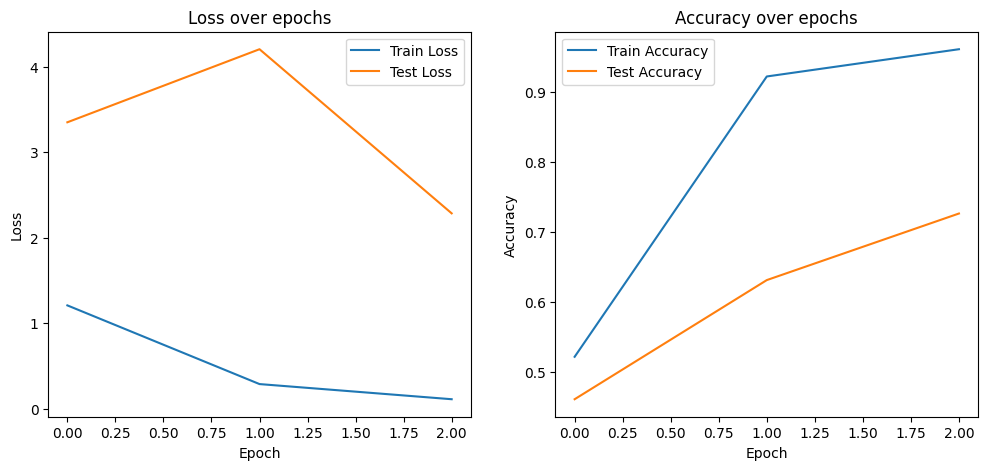

In [67]:
aug = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])
train_dataset = CustomImageDataset('data/train', transform=aug)
test_dataset = CustomImageDataset('data/test', transform=aug)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(test_dataset, batch_size=32)

# Загрузка предобученной модели
model = models.resnet18(weights='IMAGENET1K_V1')

num_classes = len(train_dataset.get_class_names())
model.fc = torch.nn.Linear(model.fc.in_features, num_classes)

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = torch.nn.CrossEntropyLoss()

train_losses, test_losses, train_accuracies, test_accuracies = [], [], [], []

for epoch in range(3):
    model.train()
    running_loss = 0
    correct = 0
    total = 0
    all_preds = []
    all_labels = []
    for x, y in train_loader:
        optimizer.zero_grad()
        out = model(x)
        loss = loss_fn(out, y)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * x.size(0)
        _, preds = torch.max(out, 1)
        correct += (preds == y).sum().item()
        total += y.size(0)

    epoch_loss = running_loss / total
    epoch_acc = correct / total
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc)

    model.eval()
    val_running_loss = 0
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for x_val, y_val in val_loader:
            out_val = model(x_val)
            loss_val = loss_fn(out_val, y_val)
            val_running_loss += loss_val.item() * x_val.size(0)
            _, val_preds = torch.max(out_val, 1)
            val_correct += (val_preds == y_val).sum().item()
            val_total += y_val.size(0)

    val_epoch_loss = val_running_loss / val_total
    val_epoch_acc = val_correct / val_total
    test_losses.append(val_epoch_loss)
    test_accuracies.append(val_epoch_acc)

    print(f"Epoch {epoch+1}/3: Train loss={epoch_loss:.4f}, Train acc={epoch_acc:.4f}, Test loss={val_epoch_loss:.4f}, Test acc={val_epoch_acc:.4f}")

# Визуализация после завершения обучения
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Loss over epochs")
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Accuracy over epochs")
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
    